In [1]:
https://www.youtube.com/watch?v=iehavRcmPNY

SyntaxError: invalid syntax (1546797036.py, line 1)

# Wine quality

The datasets are related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification tasks (good/bad). The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [2]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries inladen

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

# Voor statistische data visualisatie
import seaborn as sns; sns.set(color_codes=True)

## 1) Analyse data


In [3]:
# Load dataset from csv

dataset = pd.read_csv('./dataset/winequality-red.csv',';')
dataset.shape


c:\users\ouassim boutalliss\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1599, 12)

#### Number of Rows? columns?

In [4]:
print("Numbers of rows", dataset.shape[0])
print("Numbers of columns", dataset.shape[1])

Numbers of rows 1599
Numbers of columns 12


#### Display first 5 rows


In [5]:
dataset.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Display last 5 rows

In [6]:

dataset.tail()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### dataset information (columnnames, datatypes, missing data,...)

In [7]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Check for null values in dataset


In [8]:
dataset.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Get overall statistics about the datset


In [9]:
dataset.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Notice that te lowest number of quality 3 is and the highest 8.

I will use the 75% value to determine the classes. (higher then 6 -> good wine)

#### The target value ('quality') is a continues value -> plot the correlations



In [10]:
#correlation againt quality 

print(dataset.corr()["quality"].sort_values(ascending=False))


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

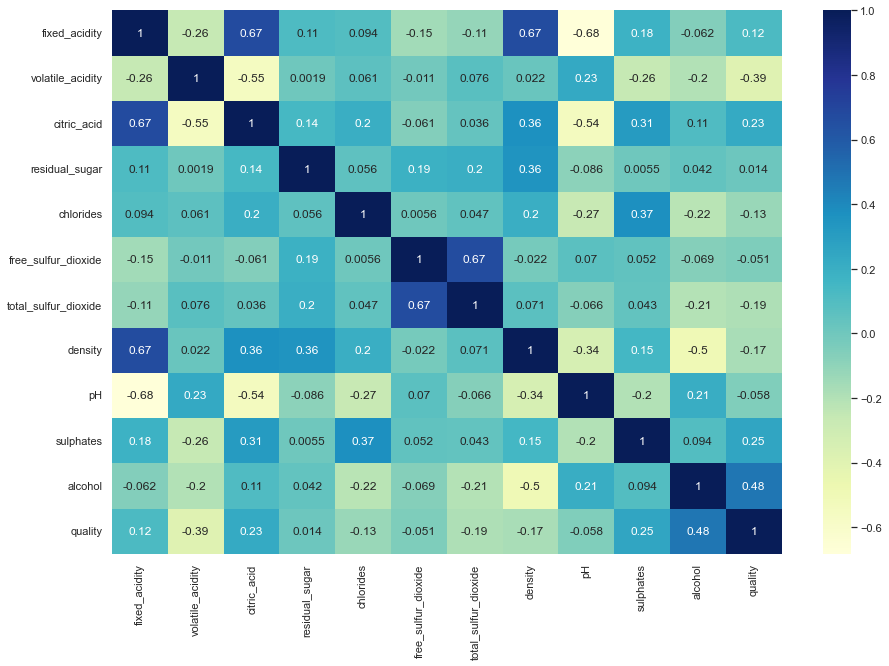

In [11]:
#heatmap correlation
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')

#### Conclusions: 
    -Alcohol has an high corr with quality, how higher the alcohol, how higher the quality
    -Volatile_acidity has an negative corr, how higher the volatile_acidity, how lower the quality
 
    -.....
    
    -Free_sulfur_dioxide has a low corr with the qualtity and a high corr with total_sulfor_dioxide. This makes the contribution of the free_sulfur_dioxide quite superfluous.
    
    - features corr values arround 0 can be deleted, because they have no influence. (residual_sugar)
    
 

#### Relationships between target and feature

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

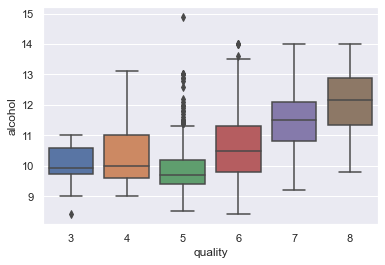

In [26]:
#boxplot influence on quality of the feature .....
sns.boxplot(x= dataset.quality, y= dataset.alcohol)

When quality increases, alcohol increases aswell -> positive influence

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

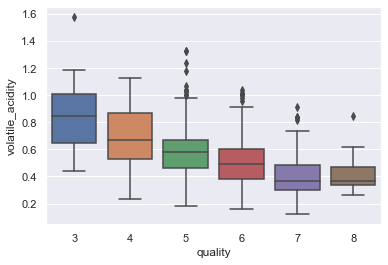

In [28]:
#boxplot influence on quality  of the feature ....
sns.boxplot(x= dataset.quality, y= dataset.volatile_acidity)

When quality increases, the volatile_acidity decrises -> negative influence

#### 4) data checken op uitschieters (outliers) via iqr

Er kan waargenomen worden dat er 2 uitschieters zijn voor quality (target waarde), dit gaan we verwijderen door de IQR

<AxesSubplot:xlabel='quality'>

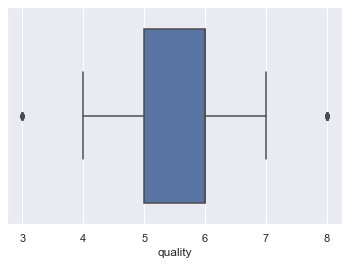

In [51]:
#boxplot to check for outliers
sns.boxplot(x= dataset.quality)

In [52]:
Q1 = dataset.quality.quantile(0.25)
Q3 = dataset.quality.quantile(0.75)

Q1, Q3

(5.0, 6.0)

In [53]:
IQR = Q3 - Q1
IQR

1.0

In [55]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.5, 7.5)

In [62]:
# remover outliers door lower & upper limit
df_no_outliers = dataset[(dataset.quality > lower_limit) & (dataset.quality < upper_limit)]

In [60]:
df_no_outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='quality'>

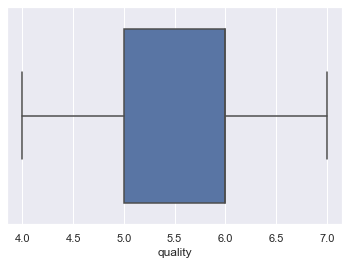

In [61]:
#boxplot to check for outliers
sns.boxplot(x= df_no_outliers.quality)

#### 6) data plotten

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

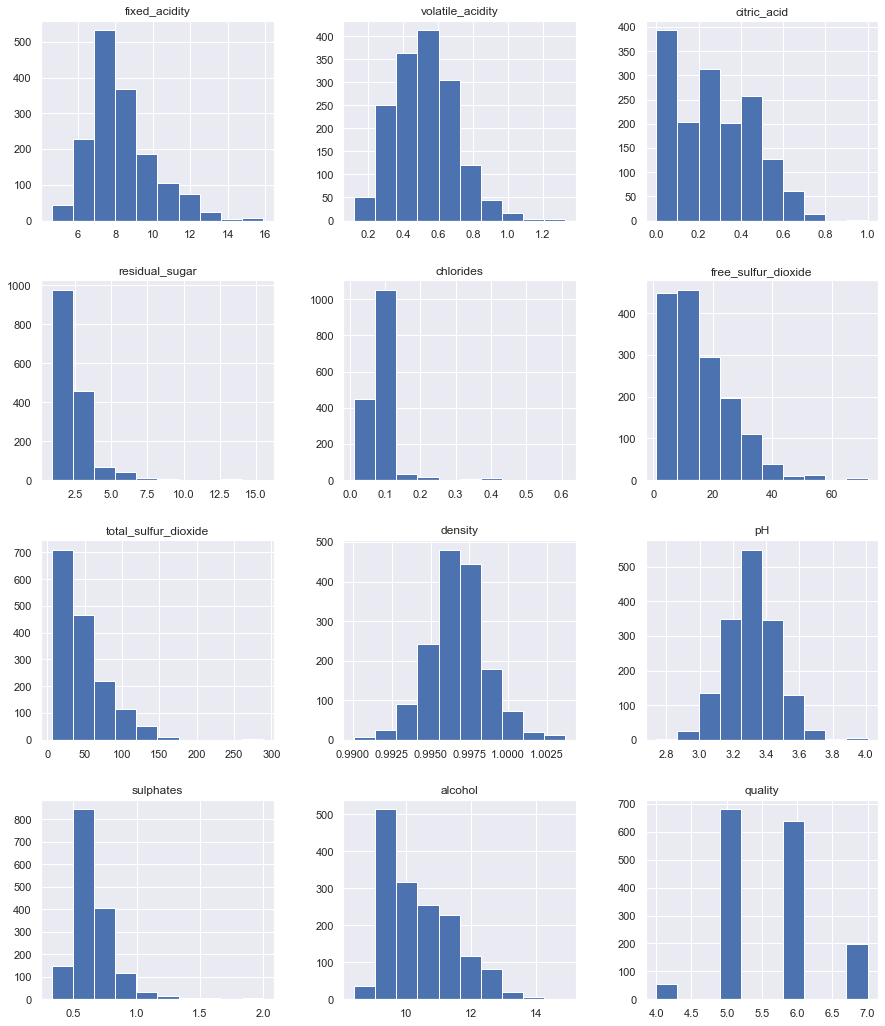

In [68]:
#distributie
df_no_outliers.hist(figsize=(15,18))

<AxesSubplot:>

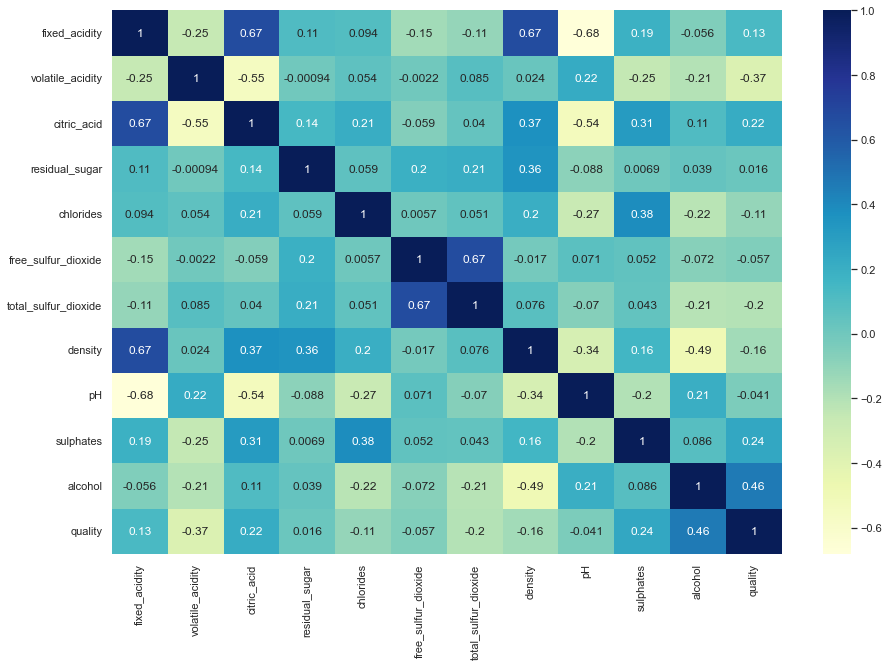

In [72]:
#4) indien regressie check op correlatie (verwijder features met negatieve corr)
plt.figure(figsize=(15,10))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='YlGnBu')

#### Waarnemingen: (extre waarden)
    -Alcohol heeft een hoge corr met quality(target), hoe hoger de alcohol hoe hoger de kwaliteit
    -volatile_acidity heeft negatieve corr, hoe hoger de volatile_acidity, hoe lager de kwaliteit
    -.....
    
    -Free_sulfur_dioxide heeft een lage correlatie met de kwaliteitsscore en een vrij hoge correlatie met de total_sulfor_dioxide. Daardoor wordt de bijdrage van de free_sulfor_dioxide vrij overbodig.
    
    - Waarden die rond de 0 schommelen mogen weggelaten worden, want die hebben geen bijdrage tot de kwaliteit (bv. residual_sugar) 